In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

## **CPI-Dollar purchasing power**

In [115]:
#load data (cpi-dollarPurchasing power)
cpi_pp_df = pd.read_csv('CPI_DollarPurchasingPower.csv')
cpi_pp_df.head()

,observation_date,CUUR0000SA0R
0,1913-01-01,1017.8
1,1913-02-01,1021.4
2,1913-03-01,1021.4
3,1913-04-01,1017.8
4,1913-05-01,1025.0


In [116]:
#missing values
cpi_pp_df.isnull().sum() #looks like there is no missing values

observation_date    0
CUUR0000SA0R        0
dtype: int64

In [123]:
#cpi-dollar purchasing power stat description
cpi_pp_df.describe()

,observation_date,CUUR0000SA0R
count,1346,1346.000000
mean,1969-01-15 03:32:53.848439820,319.247845
min,1913-01-01 00:00:00,31.300000
25%,1941-01-08 18:00:00,62.650000
50%,1969-01-16 12:00:00,279.950000
75%,1997-01-24 06:00:00,568.675000
max,2025-02-01 00:00:00,1025.000000
std,NaN,270.038674


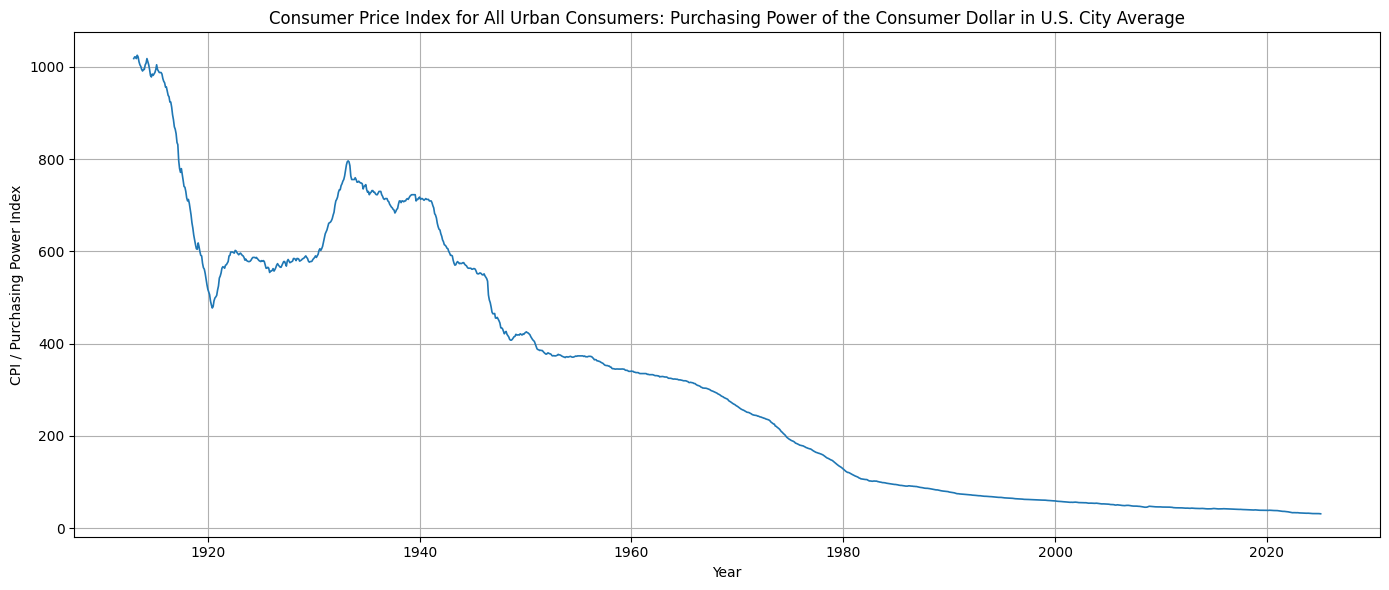

In [129]:
cpi_pp_df['observation_date'] = pd.to_datetime(cpi_pp_df['observation_date'])

# Plot
plt.figure(figsize=(14, 6))
plt.plot(cpi_pp_df['observation_date'], cpi_pp_df['CUUR0000SA0R'], linewidth=1.2)
#axes and title
plt.title('Consumer Price Index for All Urban Consumers: Purchasing Power of the Consumer Dollar in U.S. City Average')
plt.xlabel('Year')
plt.ylabel('CPI / Purchasing Power Index')
#grids
plt.grid(True)
plt.tight_layout()
plt.show()

## **S&P 500 Index vs CPI

In [130]:
#load S&P 500-dataset
sp_500_df = pd.read_csv('Macrotrends-s-p-500-index-daily.csv', skiprows=9)
sp_500_df

,Date,Closing Value
0,1927-12-30,17.66
1,1927-12-31,17.66
2,1928-01-03,17.76
3,1928-01-04,17.72
4,1928-01-05,17.55
...,...,...
25268,2024-04-01,5243.77
25269,2024-04-02,5205.81
25270,2024-04-03,5211.49
25271,2024-04-04,5147.21


In [131]:
#S&P500 max value and date
sp_500_df.max()


Date             2024-04-05
Closing Value       5254.35
dtype: object

In [120]:
#CPI dataset
cpi_df = pd.read_csv('CPI_for_all_urban_customers.csv')
cpi_df.head()

,observation_date,CPIAUCSL
0,1947-01-01,21.48
1,1947-02-01,21.62
2,1947-03-01,22.00
3,1947-04-01,22.00
4,1947-05-01,21.95


In [132]:
cpi_df.isnull().sum()

observation_date    0
CPIAUCSL            0
dtype: int64

In [79]:
# Ensure 'Date' is the index for the sp_500_df
sp_500_df['Date'] = pd.to_datetime(sp_500_df['Date'])

# Resample the data 
sp500_monthly = sp_500_df.resample('ME', on='Date').mean()

# check if 'Month' column is created
sp500_monthly['Month'] = sp500_monthly.index.to_period('M')  # 'M' for monthly period

# Check the result
print(sp500_monthly.head())


            Closing Value    Month
Date                              
1927-12-31      17.660000  1927-12
1928-01-31      17.533200  1928-01
1928-02-29      17.318261  1928-02
1928-03-31      18.247407  1928-03
1928-04-30      19.401364  1928-04


In [86]:
cpi_trimmed['Month'] = cpi_trimmed['observation_date'].dt.to_period('M')

# Merge the S&P 500 data with the CPI data based on 'Month'
combined_df = pd.merge(
    sp500_monthly[['Month', 'Closing Value']], 
    cpi_trimmed[['Month', 'CPIAUCSL']], 
    on='Month', 
    how='inner')
print(combined_df.max())

Month             2024-04
Closing Value    5202.524
CPIAUCSL          313.016
dtype: object


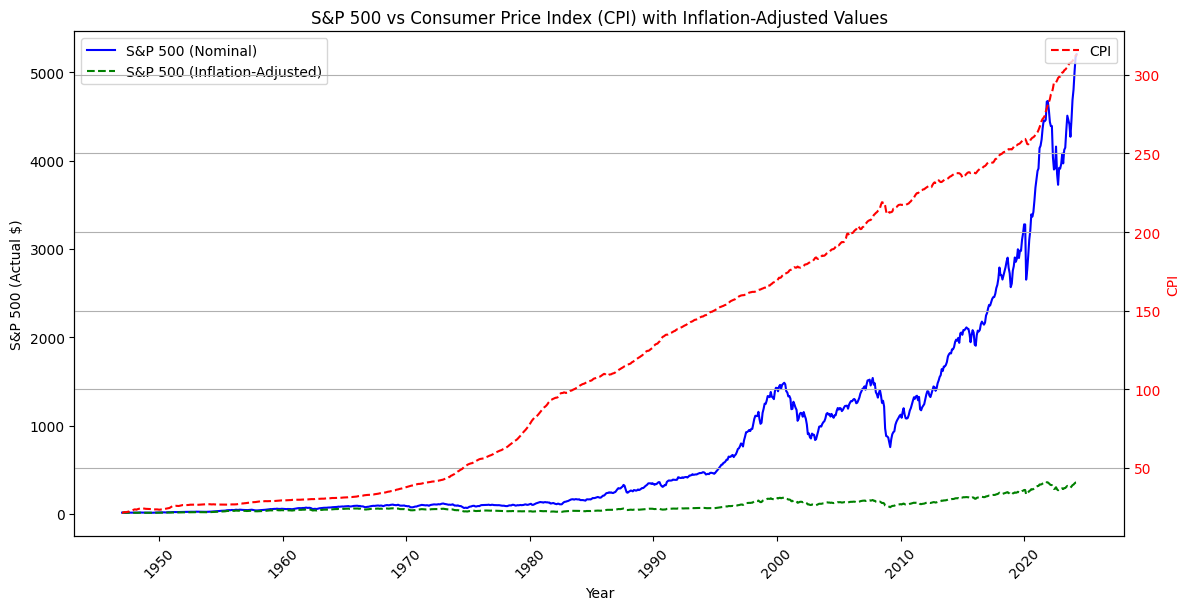

In [100]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Ensure 'Month' is in datetime format
combined_df['Month'] = pd.to_datetime(combined_df['Month'])

# Inflation adjustment
base_cpi = combined_df['CPIAUCSL'].iloc[0]
combined_df['Real_Closing_Value'] = combined_df['Closing Value'] * (base_cpi / combined_df['CPIAUCSL'])

# Plotting
fig, ax1 = plt.subplots(figsize=(12,6))

# Plot nominal S&P 500
ax1.plot(combined_df['Month'], combined_df['Closing Value'], color='blue', label='S&P 500 (Nominal)')

# Plot inflation-adjusted S&P 500
ax1.plot(combined_df['Month'], combined_df['Real_Closing_Value'], color='green', linestyle='--', label='S&P 500 (Inflation-Adjusted)')

# Y-axis and labels
ax1.set_ylabel('S&P 500 (Actual $)', color='black')
ax1.set_xlabel('Year')
ax1.tick_params(axis='y', labelcolor='black')

# Set x-axis ticks: every 10 years
ax1.xaxis.set_major_locator(mdates.YearLocator(10))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# CPI on secondary y-axis
ax2 = ax1.twinx()
ax2.plot(combined_df['Month'], combined_df['CPIAUCSL'], color='red', label='CPI', linestyle='--')
ax2.set_ylabel('CPI', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Title and legends
plt.title('S&P 500 vs Consumer Price Index (CPI) with Inflation-Adjusted Values')
fig.tight_layout()
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Rotate date labels (x-axis)
plt.setp(ax1.get_xticklabels(), rotation=45)

plt.grid(True)
plt.show()


The relationship between S&P 500 index (both nominal and inflation adjusted) and the Consumer Price Index over time.

## **Labor Force and Employement Status**

In [134]:
#data
data= pd.read_excel("cpsa2024.xlsx", skiprows=[0,1,2,3,4,5,6])
data.head()

,Persons 16 years of age and over,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,1954,108321.0,63643.0,58.8,60109.0,55.5,6205.0,53904.0,3532.0,5.5,44678.0
1,1955,109683.0,65023.0,59.3,62170.0,56.7,6450.0,55722.0,2852.0,4.4,44660.0
2,1956,110954.0,66552.0,60.0,63799.0,57.5,6283.0,57514.0,2750.0,4.1,44402.0
3,1957,112265.0,66929.0,59.6,64071.0,57.1,5947.0,58123.0,2859.0,4.3,45336.0
4,1958,113727.0,67639.0,59.5,63036.0,55.4,5586.0,57450.0,4602.0,6.8,46088.0


In [138]:
#data cleaning
data.isnull().sum()
data.dropna()

,Persons 16 years of age and over,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,1954,108321.0,63643.0,58.8,60109.0,55.5,6205.0,53904.0,3532.0,5.5,44678.0
1,1955,109683.0,65023.0,59.3,62170.0,56.7,6450.0,55722.0,2852.0,4.4,44660.0
2,1956,110954.0,66552.0,60.0,63799.0,57.5,6283.0,57514.0,2750.0,4.1,44402.0
3,1957,112265.0,66929.0,59.6,64071.0,57.1,5947.0,58123.0,2859.0,4.3,45336.0
4,1958,113727.0,67639.0,59.5,63036.0,55.4,5586.0,57450.0,4602.0,6.8,46088.0
...,...,...,...,...,...,...,...,...,...,...,...
66,2020,260329.0,160742.0,61.7,147795.0,56.8,2349.0,145446.0,12947.0,8.1,99587.0
67,2021,261445.0,161204.0,61.7,152581.0,58.4,2291.0,150290.0,8623.0,5.3,100241.0
68,2022,263973.0,164287.0,62.2,158291.0,60.0,2290.0,156001.0,5996.0,3.6,99686.0
69,2023,266942.0,167116.0,62.6,161037.0,60.3,2264.0,158772.0,6080.0,3.6,99826.0


In [139]:
#descriptive stat
data.describe()

,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
count,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000
mean,186607.760563,118692.549296,63.167606,111748.746479,59.478873,3344.971831,108403.661972,6943.788732,5.818310,67915.197183
std,49605.976279,33940.193075,2.797641,32076.313490,2.655878,1119.952588,33058.410605,2826.859746,1.592151,16416.497074
min,108321.000000,63643.000000,58.700000,60109.000000,55.400000,2095.000000,53904.000000,2750.000000,3.500000,44402.000000
25%,142171.000000,85708.000000,60.400000,80760.000000,57.350000,2330.000000,77320.500000,4798.000000,4.600000,56462.500000
50%,186393.000000,123869.000000,63.200000,117342.000000,59.300000,3283.000000,114142.000000,6982.000000,5.500000,62944.000000
75%,230341.000000,152276.000000,66.000000,139873.000000,61.950000,3477.000000,137695.000000,8304.000000,6.850000,78065.000000
max,268571.000000,168106.000000,67.100000,161346.000000,64.400000,6450.000000,159091.000000,14825.000000,9.700000,100465.000000


In [142]:
#rename the columns
df = data.rename(columns = {'HOUSEHOLD DATA\n ANNUAL AVERAGES\n 1.  Employment status of the civilian noninstitutional population, 1954 to date':'Year',
                              'Unnamed: 1': 'Civilian_Nonconstitutional_Popl',
                             'Unnamed: 2': 'Total_Labor_Force',
                            'Unnamed: 3': '%_of_Population',
                             'Unnamed: 4': 'Total_Employed', 
                            'Unnamed: 5':'%_of_Population_Employed',
                             'Unnamed: 6': 'Agriculture_Employed',
                            'Unnamed: 7': 'Non_Agricultural_Industries_Employed', 
                             'Unnamed: 8': 'Number_Unemployed', 
                            'Unnamed: 9': '%_Labor_Force_Unemplyed',
                              'Unnamed: 10': 'Not_in_Labor_Force'
                            }, inplace =True)
data.head()

,Persons 16 years of age and over,Civilian_Nonconstitutional_Popl,Total_Labor_Force,%_of_Population,Total_Employed,%_of_Population_Employed,Agriculture_Employed,Non_Agricultural_Industries_Employed,Number_Unemployed,%_Labor_Force_Unemplyed,Not_in_Labor_Force
0,1954,108321.0,63643.0,58.8,60109.0,55.5,6205.0,53904.0,3532.0,5.5,44678.0
1,1955,109683.0,65023.0,59.3,62170.0,56.7,6450.0,55722.0,2852.0,4.4,44660.0
2,1956,110954.0,66552.0,60.0,63799.0,57.5,6283.0,57514.0,2750.0,4.1,44402.0
3,1957,112265.0,66929.0,59.6,64071.0,57.1,5947.0,58123.0,2859.0,4.3,45336.0
4,1958,113727.0,67639.0,59.5,63036.0,55.4,5586.0,57450.0,4602.0,6.8,46088.0


In [143]:
#rename one column
data.rename(columns={'Persons 16 years of age and over':'Year'}, inplace=True)
data.head()

,Year,Civilian_Nonconstitutional_Popl,Total_Labor_Force,%_of_Population,Total_Employed,%_of_Population_Employed,Agriculture_Employed,Non_Agricultural_Industries_Employed,Number_Unemployed,%_Labor_Force_Unemplyed,Not_in_Labor_Force
0,1954,108321.0,63643.0,58.8,60109.0,55.5,6205.0,53904.0,3532.0,5.5,44678.0
1,1955,109683.0,65023.0,59.3,62170.0,56.7,6450.0,55722.0,2852.0,4.4,44660.0
2,1956,110954.0,66552.0,60.0,63799.0,57.5,6283.0,57514.0,2750.0,4.1,44402.0
3,1957,112265.0,66929.0,59.6,64071.0,57.1,5947.0,58123.0,2859.0,4.3,45336.0
4,1958,113727.0,67639.0,59.5,63036.0,55.4,5586.0,57450.0,4602.0,6.8,46088.0


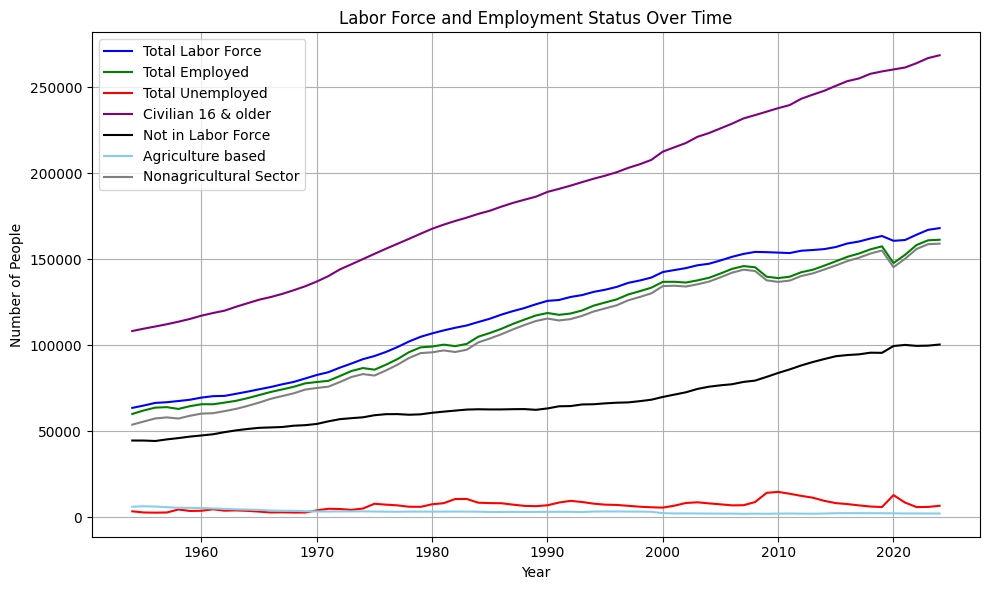

In [144]:
#plot labor force and employment status 
plt.figure(figsize=(10,6))

#Convert the 'Year' column to integer
data['Year'] = pd.to_numeric(data['Year'], errors='coerce')

#plot
plt.plot(data['Year'], data['Total_Labor_Force'], label='Total Labor Force', color='blue')
plt.plot(data['Year'], data['Total_Employed'], label='Total Employed', color='green')
plt.plot(data['Year'], data['Number_Unemployed'], label='Total Unemployed', color='red')
plt.plot(data['Year'], data['Civilian_Nonconstitutional_Popl'], label='Civilian 16 & older', color='purple')
plt.plot(data['Year'], data['Not_in_Labor_Force'], label='Not in Labor Force', color='black')
plt.plot(data['Year'], data['Agriculture_Employed'], label='Agriculture based', color='skyblue')
plt.plot(data['Year'], data['Non_Agricultural_Industries_Employed'], label='Nonagricultural Sector', color='gray')
#labels and legends
plt.xlabel('Year')
plt.ylabel('Number of People')
plt.title('Labor Force and Employment Status Over Time')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

The graph above compares the labor force—consisting of all individuals aged 16 and older who are either employed or unemployed—and breaks down the data by the industries in which they are employed (agricultural or nonagricultural sectors).